# Unsupervised Learning Techniques

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

## Clustering

In [36]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import mean_squared_error
from sklearn.metrics import silhouette_score
from matplotlib.image import  imread
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

### K-Means

In [3]:
blob_centers = np.array([
    [0.2, 2.3],
    [-1.5, 2.3],
    [-2.8, 1.8],
    [-2.8, 2.8],
    [-2.8, 1.3],
])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

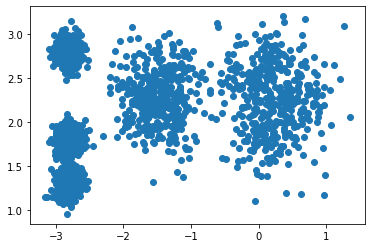

In [4]:
plt.scatter(X[:, 0], X[:, 1])

In [5]:
k = 5
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(X)

Text(0.5, 1.0, 'predicted clusters')

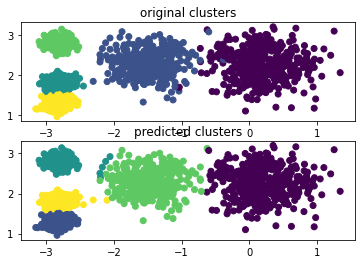

In [6]:
plt.subplot(211)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title('original clusters')

plt.subplot(212)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title('predicted clusters')

In [7]:
kmeans.cluster_centers_

array([[ 0.20876306,  2.25551336],
       [-2.80037642,  1.30082566],
       [-2.79290307,  2.79641063],
       [-1.46679593,  2.28585348],
       [-2.80389616,  1.80117999]])

In [8]:
mean_squared_error(blob_centers, kmeans.cluster_centers_)

0.5977244875087605

In [9]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([0, 0, 2, 2], dtype=int32)

In [10]:
kmeans.inertia_

211.5985372581683

In [11]:
silhouette_score(X, kmeans.labels_)

0.655517642572828

### Using clustering for image segmentation

In [12]:
image = imread(os.path.join('images', 'ladybug.png'))
image.shape

(533, 800, 3)

(-0.5, 799.5, 532.5, -0.5)

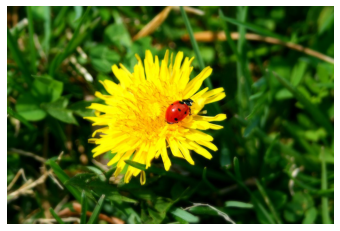

In [13]:
plt.imshow(image)
plt.axis('off')

In [16]:
X = image.reshape(-1, 3)
kmeans = KMeans(n_clusters=8).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

(-0.5, 799.5, 532.5, -0.5)

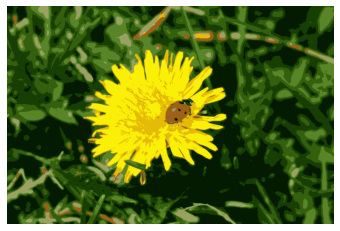

In [18]:
plt.imshow(segmented_img)
plt.axis('off')

### using Clustering for Preprocessing

In [20]:
X_digits, y_digits = load_digits(return_X_y=True)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits)

In [32]:
log_reg = LogisticRegression(multi_class='ovr', solver='lbfgs', max_iter=5000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=5000, multi_class='ovr')

In [33]:
log_reg.score(X_test, y_test)

0.9688888888888889

In [34]:
pipeline = Pipeline([
    ('kmeans', KMeans(n_clusters=50)),
    ('log_reg', LogisticRegression(multi_class='ovr', solver='lbfgs', max_iter=5000)),
])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('kmeans', KMeans(n_clusters=50)),
                ('log_reg',
                 LogisticRegression(max_iter=5000, multi_class='ovr'))])

In [35]:
pipeline.score(X_test, y_test)

0.98

In [38]:
param_grid = dict(kmeans__n_clusters=range(2, 100, 5))
grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=2)
grid_clf.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END ...............................kmeans__n_clusters=2; total time=   0.7s
[CV] END ...............................kmeans__n_clusters=2; total time=   0.4s
[CV] END ...............................kmeans__n_clusters=2; total time=   0.5s
[CV] END ...............................kmeans__n_clusters=7; total time=   0.9s
[CV] END ...............................kmeans__n_clusters=7; total time=   0.4s
[CV] END ...............................kmeans__n_clusters=7; total time=   1.0s
[CV] END ..............................kmeans__n_clusters=12; total time=   3.2s
[CV] END ..............................kmeans__n_clusters=12; total time=   3.0s
[CV] END ..............................kmeans__n_clusters=12; total time=   2.5s
[CV] END ..............................kmeans__n_clusters=17; total time=   4.9s
[CV] END ..............................kmeans__n_clusters=17; total time=   4.5s
[CV] END ..............................kmeans__n

KeyboardInterrupt: 

In [ ]:
print(grid_clf.best_params_)
print(grid_clf.score(X_test, y_test))